# Example of abnormal detection for text data

In [3]:
from preprocessing.embeddedText import *
#text = amazoneText("finefoods.txt")
text = amazoneText("movies.txt")
len(text.word_vec)

100% (71205231 of 71205231) |############| Elapsed Time: 0:12:22 Time:  0:12:22
  4% (317968 of 7911684) |               | Elapsed Time: 0:02:19 ETA:   0:54:11/sandbox/OneClassClassifier/preprocessing/embeddedText.py:62: RuntimeWarning: invalid value encountered in true_divide
  return sentence_sum/norm
100% (7911684 of 7911684) |##############| Elapsed Time: 0:58:35 Time:  0:58:35


7911648

In [2]:
sums = np.sum(text.embedding_model(np.array(text.vectors[1])), axis=1)
#np.sum(sums)
sums/np.linalg.norm(sums)

NameError: name 'text' is not defined

## Find with reconstruction errors from Autoencoder

In [ ]:
import occ

autoEncoder = occ.occ()
autoEncoder.X = text.word_vec
autoEncoder.train(model='autoEncoder', hidden_neurons=[64,32,16,4,4,16,32,64], epochs=5, nu=0.05)
Y_hat = autoEncoder.predict()
autoEncoder.show_projection(autoEncoder.X, autoEncoder.get_score(autoEncoder.X), title="Prediction score AutoEncoder", markersize=100)
autoEncoder.show_projection(autoEncoder.X, Y_hat, title="Prediction AutoEncoder masked", markersize=100)

scores = autoEncoder.get_score(autoEncoder.X)
scores = np.squeeze(scores)
abnormal_idx = list(np.argsort(scores, axis=0))

In [11]:
### Abnormal samples
print("Abnormals:")
for i in range(1,50):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

print("\n\n\n")
### Normal samples
print("Normals:")
for i in range(300000,300050):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

Abnormals:
 Cannot watch a DVD title with no dialog track! => 1.0 6/6
[ I was sooooo excited to see that Rhino Video was finally releasing this schlock 1962 B&amp;W C-grade Sci-Fi/Horror gem, having worn out 2 VHS video copies of it. I grew up with this title, and it's still FABULOUS-as bottom-shelf as it gets. However, when I received my copy, it had no audible dialog track for the actors! I contacted Rhino for a replacement, having told them about the problem. After sending back the original copy at my own expense, I received a replacement approx. 1 mo. later. It too contained no dialog track. The sound track for the ambient sound (background/sound effects/musical score) is there, and the picture/transfer print is nice, but without dialog, it is thoroughly unwatchable. All in all, the most unsatisfying experience I have had with ANY DVD product ever. I don't know if I just happened to score the &quot;mother lode&quot; with 2 defective copies out of thousands, or what. I do know that 

## Find with Isolation forest.

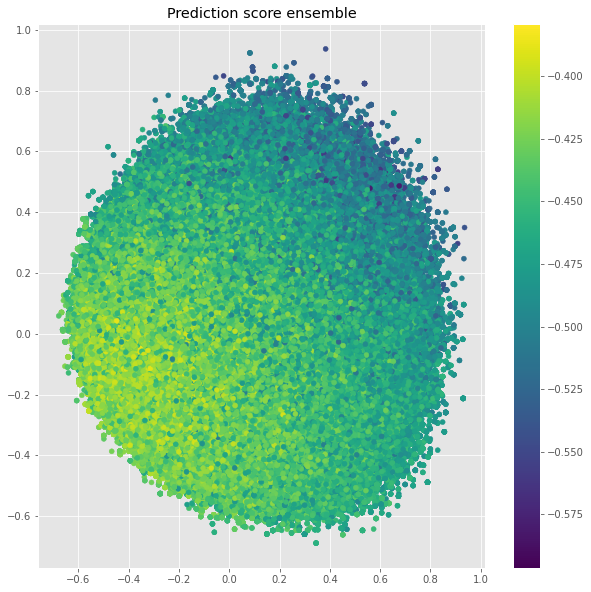

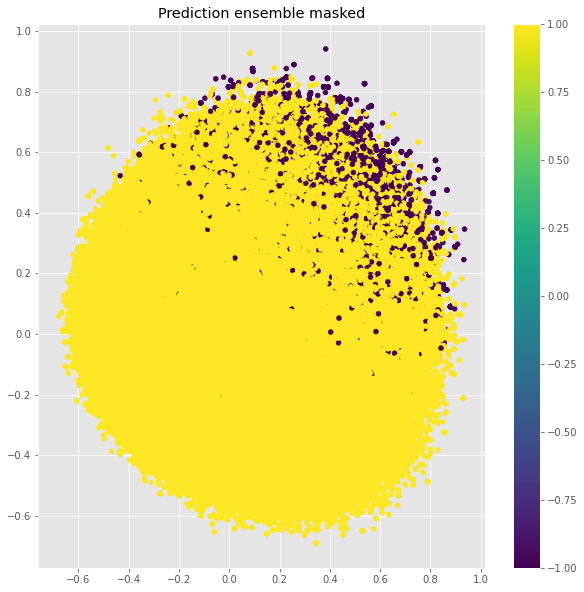

In [12]:
import occ

isoForest = occ.occ()
isoForest.X = text.word_vec
isoForest.train(model='isolationForest', nu=0.01)
Y_hat = isoForest.predict()
isoForest.show_projection(isoForest.X, isoForest.get_score(isoForest.X), title="Prediction score ensemble", markersize=100)
isoForest.show_projection(isoForest.X, Y_hat, title="Prediction ensemble masked", markersize=100)

scores = isoForest.get_score(isoForest.X)
scores = np.squeeze(scores)
abnormal_idx = list(np.argsort(scores, axis=0))

In [14]:
### Abnormal samples
print("Abnormals:")
for i in range(50):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

print("\n\n\n")
### Normal samples
print("Normals:")
for i in range(300000,300050):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

Abnormals:
 The Gospel => 2.0 4/10
[ A great concept. A great cast. Great Singers. Unfortunately for us this movie yields only fair to middling results.The storyline was underdevoped and the characters too one dimensional for me. Donnie McClurkin's character was pointless. I wish more emphasis was put on the character played by Aloma Wright. She is a very good character actress (in comedy as well as drama). Her character seemed to be the moral conscience of the plot line. We needed more of her. She was the best of the cast even with ther limited role.Boris Kodjoe is good as the lead character. His performance was superior to anything he did on Showtime's Soul Food. Idris Elba was very good as the preacher with an ego gone awry. He could have used a juicier part.The cameos were interesting though not really exciting. Hezekiah Walker, Yolanda Adams and Kirk Franklin and Fred Hammond were useful for drawing gospel music lovers into the theatre but their presence in the film and suprisingl